In [41]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KDTree
from sklearn.svm import SVR
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pickle


In [2]:
df = pd.read_csv("65d4f0fcb8af9_amex_campus_challenge_train_3.csv")

In [8]:
df = df.fillna(df.mean())

In [9]:
customer_columns = [col for col in df.columns if col.startswith('customer_') or col.startswith('distance_')]
df_customer = df[customer_columns]

In [6]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12229978 entries, 0 to 12229977
Data columns (total 53 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   customer_digital_activity_04  float64
 1   customer_spend_01             float64
 2   customer_industry_spend_01    float64
 3   customer_industry_spend_02    float64
 4   customer_industry_spend_03    float64
 5   customer_industry_spend_04    float64
 6   customer_industry_spend_05    float64
 7   customer_spend_02             float64
 8   customer_spend_03             float64
 9   customer_merchant_02          float64
 10  customer_merchant_01          float64
 11  customer_spend_04             float64
 12  customer_spend_05             float64
 13  customer_spend_06             float64
 14  customer_spend_07             float64
 15  customer_merchant_03          float64
 16  customer_profile_01           float64
 17  customer_profile_02           float64
 18  customer_digital_act

In [9]:
df_customer.head(10)

,customer_digital_activity_04,customer_spend_01,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_spend_02,customer_spend_03,customer_merchant_02,...,customer_spend_18,customer_spend_19,customer_digital_activity_21,customer_digital_activity_22,distance_04,customer_digital_activity_01,customer_profile_03,customer_digital_activity_02,customer_profile_04,distance_05
0,9.745803,107.215862,26.686594,74.000000,3682.750000,138.000000,111.000000,14.000000,133.000000,1.7469,...,0.714531,20.850000,0.017921,0.000468,4.000000,0.000000,58.434969,32.500000,86.0,15.856826
1,9.745803,35.552000,50.928261,3.000000,1171.350000,23.000000,17.000000,2.000000,8.000000,1.7469,...,0.871597,24.810000,0.007067,0.000433,3.808333,0.419355,5.392089,7.000000,125.0,6.998555
2,9.745803,31.623103,48.837872,19.000000,2295.380000,47.000000,42.000000,11.000000,62.000000,1.7469,...,0.076536,32.260000,0.000000,0.000000,30.822421,0.836364,33.780445,0.000000,180.0,1.753009
3,9.745803,112.277391,116.329031,12.486146,2160.901083,30.912555,23.552949,16.000000,33.000000,1.7469,...,1.863472,76.468595,0.000000,0.000000,2.000000,0.952381,37.340085,28.666667,134.0,9.000063
4,9.745803,448.427273,116.329031,12.486146,2160.901083,30.912555,23.552949,5.000000,8.000000,1.7469,...,1.863472,76.468595,0.000000,0.000000,6.500000,0.754386,77.794164,15.000000,114.0,1.767939
5,9.745803,81.858000,116.329031,12.486146,2160.901083,30.912555,23.552949,9.000000,72.000000,1.7469,...,1.863472,76.468595,0.000000,0.000408,1.000000,0.212766,73.403888,1.166667,80.0,1.366169
6,9.745803,134.226734,116.329031,12.486146,2160.901083,30.912555,23.552949,7.641269,45.296485,1.7469,...,1.863472,76.468595,0.007067,0.000433,6.625000,0.581818,47.735580,0.000000,193.0,18.914194
7,9.745803,45.241765,17.014430,69.000000,2535.150000,149.000000,109.000000,7.000000,133.000000,1.7469,...,0.298720,12.140000,0.012821,0.000266,5.760000,0.243243,98.155236,46.833333,142.0,0.063262
8,9.745803,18.223538,29.103333,7.000000,261.930000,9.000000,6.000000,10.000000,43.000000,1.7469,...,0.041135,14.420000,0.000000,0.000000,7.375000,0.530574,24.006210,7.333333,186.0,1.542463
9,9.745803,1400.000000,1035.125000,1.000000,2070.250000,2.000000,2.000000,1.000000,1.000000,1.7469,...,1.190497,670.250000,0.007067,0.000433,30.822421,0.238095,18.565891,0.000000,79.0,2.830609


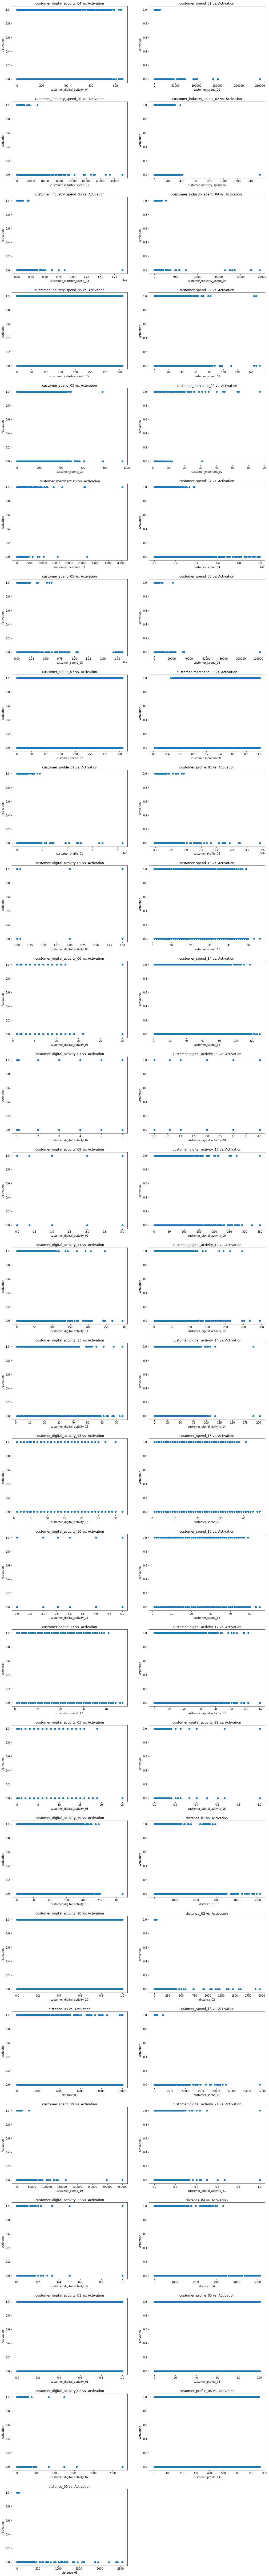

In [ ]:
n = len(customer_columns)
nrows = int(np.ceil(n / 2))  
ncols = 2  
fig, axs = plt.subplots(nrows, ncols, figsize=(15, nrows * 5))  
fig.tight_layout(pad=5.0)
axs = axs.flatten()
for i, col in enumerate(customer_columns):
    axs[i].scatter(df_customer[col],df["activation"])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Activation")
    axs[i].set_title(f'{col} vs. {"Activation"}')

for ax in axs[i+1:]:
    ax.set_visible(False)

plt.show()

In [ ]:
corr_dict = {}
for col in customer_columns:
    corr_dict[f"{col} vs. Activation: "] = df_customer[col].corr(df["activation"])

Top Correlations


In [ ]:
sorted_features = {k: v for k, v in sorted(corr_dict.items(), key=lambda item: abs(item[1]), reverse=True)}
sorted_features

{'customer_industry_spend_05 vs. Activation: ': 0.0916385257939512,
 'customer_industry_spend_02 vs. Activation: ': 0.08847290033589303,
 'customer_spend_03 vs. Activation: ': 0.07377779594771137,
 'customer_digital_activity_22 vs. Activation: ': 0.0721915874054083,
 'customer_industry_spend_04 vs. Activation: ': 0.07196115992207167,
 'customer_spend_07 vs. Activation: ': 0.06768110087541819,
 'customer_merchant_03 vs. Activation: ': 0.055112587179429365,
 'customer_spend_06 vs. Activation: ': 0.05282135904087846,
 'customer_spend_02 vs. Activation: ': 0.05086455189555437,
 'customer_digital_activity_21 vs. Activation: ': 0.049431503113792866,
 'customer_profile_03 vs. Activation: ': 0.04703019316871074,
 'customer_digital_activity_20 vs. Activation: ': -0.03949774708395482,
 'customer_spend_16 vs. Activation: ': -0.03195572965453802,
 'customer_spend_04 vs. Activation: ': -0.02998402234128268,
 'customer_digital_activity_19 vs. Activation: ': 0.028487427233573823,
 'distance_05 vs. Ac

In [ ]:
filtered = []
for index,key in enumerate(sorted_features.keys()):
    if abs(sorted_features[key]) < 0.02:
        break
    filtered.append(key.split()[0])
filtered

['customer_industry_spend_05',
 'customer_industry_spend_02',
 'customer_spend_03',
 'customer_digital_activity_22',
 'customer_industry_spend_04',
 'customer_spend_07',
 'customer_merchant_03',
 'customer_spend_06',
 'customer_spend_02',
 'customer_digital_activity_21',
 'customer_profile_03',
 'customer_digital_activity_20',
 'customer_spend_16',
 'customer_spend_04',
 'customer_digital_activity_19',
 'distance_05',
 'customer_spend_13',
 'customer_merchant_02']

In [ ]:
with open('customer_filter.pkl', 'wb+') as f:
    pickle.dump(filtered, f)

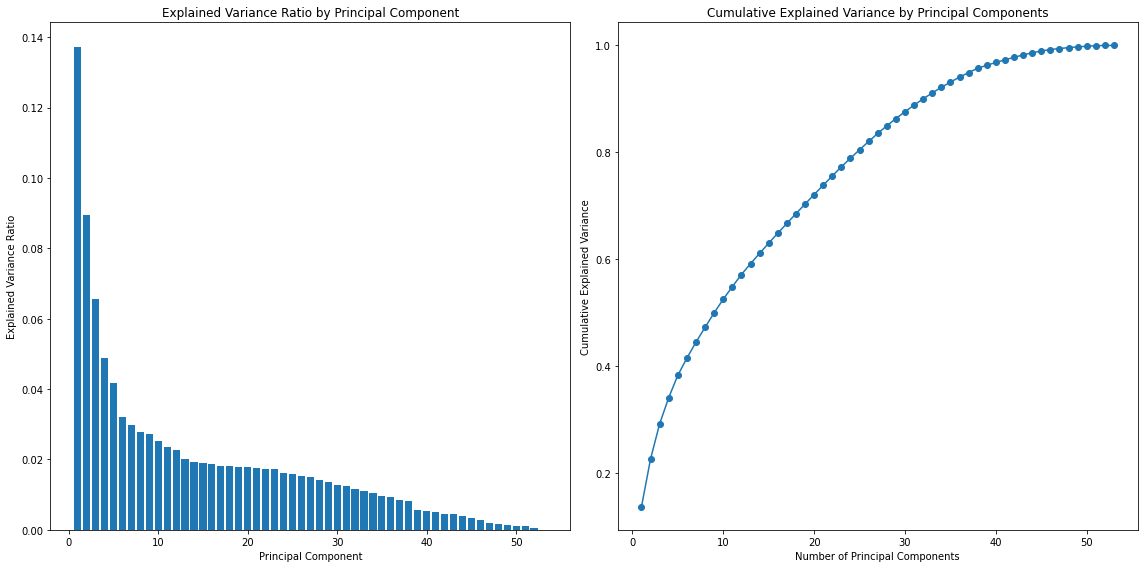

In [11]:
X = df_customer
y = df["activation"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a 2x1 grid of subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot the explained variance ratio in the first subplot
ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
ax1.set_xlabel("Principal Component")
ax1.set_ylabel("Explained Variance Ratio")
ax1.set_title("Explained Variance Ratio by Principal Component")

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance in the second subplot
ax2.plot(
    range(1, len(cumulative_explained_variance) + 1),
    cumulative_explained_variance,
    marker="o",
)
ax2.set_xlabel("Number of Principal Components")
ax2.set_ylabel("Cumulative Explained Variance")
ax2.set_title("Cumulative Explained Variance by Principal Components")

# Display the figure
plt.tight_layout()
plt.show()

In [ ]:
def k_means(df):
    df_filtered = df[filtered]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df_filtered)
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(scaled_features)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    k_optimal = 4

    kmeans = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(scaled_features)

    df_filtered['Cluster_Label'] = cluster_labels
    return df_filtered, kmeans

In [ ]:
df_averaged = df[[col for col in df.columns if col.startswith('customer') or col.startswith('distance_')]].groupby(['customer']).mean()
df_averaged

,customer_digital_activity_04,customer_spend_01,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_spend_02,customer_spend_03,customer_merchant_02,...,customer_spend_18,customer_spend_19,customer_digital_activity_21,customer_digital_activity_22,distance_04,customer_digital_activity_01,customer_profile_03,customer_digital_activity_02,customer_profile_04,distance_05
customer,,,,,,,,,,,,,,,,,,,,,
0,18.000000,102.508261,93.748592,44.842105,15417.388947,272.157895,205.052632,18.000000,92.000000,NaN,...,1.008392,34.730000,0.016924,0.001283,63.518658,1.000000,99.714867,4.833333,448.0,0.250860
1,18.000000,63.847200,15.130000,1.000000,15.130000,1.000000,1.000000,1.000000,9.000000,NaN,...,0.546907,15.130000,0.003066,0.000289,5.566722,0.358974,27.542687,6.500000,340.0,1.714802
2,2.600000,41.345227,30.092223,7.473684,1345.579474,50.526316,41.210526,7.000000,38.000000,NaN,...,0.742170,20.001389,0.005299,0.000209,55.615568,1.000000,74.040338,2.500000,345.0,3.574781
3,2.750000,36.121429,22.451596,9.666667,574.467222,17.944444,16.555556,8.000000,66.000000,NaN,...,1.208645,17.656842,0.013072,0.000299,13.283763,1.000000,99.425764,1.500000,394.0,1.663865
4,10.000000,62.456000,49.677537,3.206897,189.920345,4.206897,3.000000,3.000000,30.000000,NaN,...,0.349170,9.995179,0.003399,0.000110,28.948144,0.755102,100.000000,3.666667,510.0,2.865087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462579,1.500000,62.735000,52.882500,3.000000,211.530000,4.000000,3.000000,3.000000,3.000000,NaN,...,0.160884,8.690000,0.011432,0.000289,23.125408,1.000000,56.469776,2.833333,73.0,16.937217
462580,7.250000,184.290000,998.515775,2.142857,2294.737857,6.071429,5.714286,3.000000,9.000000,NaN,...,2.514283,181.530714,0.001941,0.000169,87.714275,0.964286,78.461431,31.500000,73.0,2.172275
462581,18.500000,30.629000,28.385178,9.227273,911.399545,23.909091,20.227273,10.296296,63.555556,NaN,...,0.612537,17.722174,0.005015,0.000259,15.335698,0.069767,99.296118,14.166667,73.0,6.612134


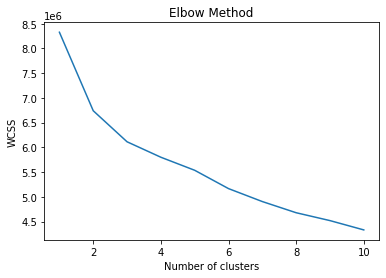

/var/folders/y4/v7sdcvh56wl7y3jrg3d2t8040000gn/T/ipykernel_1789/3680884295.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cluster_Label'] = cluster_labels


In [ ]:
df_filtered, kmeans = k_means(df_averaged)

In [44]:
df_filtered

,customer_industry_spend_05,customer_industry_spend_02,customer_spend_03,customer_digital_activity_22,customer_industry_spend_04,customer_spend_07,customer_merchant_03,customer_spend_06,customer_spend_02,customer_digital_activity_21,customer_profile_03,customer_digital_activity_20,customer_spend_16,customer_spend_04,customer_digital_activity_19,distance_05,customer_spend_13,customer_merchant_02,Cluster_Label
customer,,,,,,,,,,,,,,,,,,,
0,195.977647,43.224307,92.000000,0.000943,260.095628,318.000000,0.872889,909.000000,18.000000,0.012981,99.714867,0.609846,1.855289,19561.995573,16.585902,0.250860,2.065817,1.746900,3
1,14.531770,7.891687,9.000000,0.000330,18.947533,20.280000,0.797387,21.280000,1.000000,0.004346,27.542687,0.690970,6.365002,133973.517985,14.239344,1.714802,7.094832,1.746900,2
2,35.534877,9.084833,38.000000,0.000329,44.221893,260.000000,0.851438,644.000000,7.000000,0.006309,74.040338,0.628561,5.357831,70381.887896,10.048244,3.574781,8.180517,1.746900,0
3,19.354513,10.794458,66.000000,0.000357,23.131689,148.000000,0.828463,259.000000,8.000000,0.010470,99.425764,0.605216,5.924040,76531.418575,10.267541,1.663865,10.138664,1.746900,0
4,11.632239,7.104181,30.000000,0.000226,15.423273,26.000000,0.779205,47.000000,3.000000,0.004793,100.000000,0.669142,8.868848,120963.155451,13.974558,2.865087,10.266397,1.746900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462579,10.707356,6.557305,3.000000,0.000370,14.092208,14.000000,0.356623,22.000000,3.000000,0.008977,56.469776,0.672280,2.069111,107021.303817,13.724385,16.937217,3.957271,1.746900,2
462580,15.496779,7.814983,9.000000,0.000280,19.693982,92.000000,0.477757,115.000000,3.000000,0.004091,78.461431,0.660551,5.159122,195291.228269,13.449709,2.172275,5.090084,1.746900,2
462581,20.843139,9.830768,63.555556,0.000304,25.206029,235.222222,0.859220,558.000000,10.296296,0.005547,99.296118,0.644980,5.326212,38952.756687,12.781907,6.612134,9.089696,1.746900,0


In [45]:
cluster_labels = df_filtered['Cluster_Label'].tolist()

In [46]:
len(cluster_labels)

462584

In [47]:
with open('cluster_labels.pkl', 'wb+') as f:
    pickle.dump(cluster_labels, f)

In [48]:
with open('cluster_model.pkl', 'wb+') as f:
    pickle.dump(kmeans, f)

In [10]:
with open('cluster_labels.pkl', 'rb') as f:
    cluster_labels = pickle.load(f)

In [11]:
with open('cluster_model.pkl', 'rb') as f:
    kmeans = pickle.load(f)

In [12]:
with open('customer_rates.pkl', 'rb') as f:
    customer_rates = pickle.load(f)

In [13]:
customer_rates = dict(sorted(customer_rates.items()))

In [14]:
weights = [1 + 10 * abs(rate['incremental_activation'].tolist()[0]) for rate in customer_rates.values()]

In [52]:
weights

[2.052631578947368,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.263157894736842,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.4761904761904763,
 1.1238390092879258,
 1.0,
 1.1785714285714286,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.3846153846153846,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.8695652173913042,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.3985507246376812,
 1.0,
 1.0,
 1.4545454545454546,
 1.5882352941176472,
 1.0,
 1.0,
 1.0,
 1.3846153846153846,
 1.0,
 1.0,
 1.4,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.25,
 1.0,
 1.0,
 1.3333333333333333,
 1.0,
 1.0,
 1.0,
 1.526315789473684,
 1.0,
 1.0,
 1.0,
 1.0,
 1.6,
 1.5555555555555556,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.6666666666666665,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.2941176470588236,
 1.0,
 1.0,
 1.3846153846153846,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.

In [53]:
df_filtered

,customer_industry_spend_05,customer_industry_spend_02,customer_spend_03,customer_digital_activity_22,customer_industry_spend_04,customer_spend_07,customer_merchant_03,customer_spend_06,customer_spend_02,customer_digital_activity_21,customer_profile_03,customer_digital_activity_20,customer_spend_16,customer_spend_04,customer_digital_activity_19,distance_05,customer_spend_13,customer_merchant_02,Cluster_Label
customer,,,,,,,,,,,,,,,,,,,
0,195.977647,43.224307,92.000000,0.000943,260.095628,318.000000,0.872889,909.000000,18.000000,0.012981,99.714867,0.609846,1.855289,19561.995573,16.585902,0.250860,2.065817,1.746900,3
1,14.531770,7.891687,9.000000,0.000330,18.947533,20.280000,0.797387,21.280000,1.000000,0.004346,27.542687,0.690970,6.365002,133973.517985,14.239344,1.714802,7.094832,1.746900,2
2,35.534877,9.084833,38.000000,0.000329,44.221893,260.000000,0.851438,644.000000,7.000000,0.006309,74.040338,0.628561,5.357831,70381.887896,10.048244,3.574781,8.180517,1.746900,0
3,19.354513,10.794458,66.000000,0.000357,23.131689,148.000000,0.828463,259.000000,8.000000,0.010470,99.425764,0.605216,5.924040,76531.418575,10.267541,1.663865,10.138664,1.746900,0
4,11.632239,7.104181,30.000000,0.000226,15.423273,26.000000,0.779205,47.000000,3.000000,0.004793,100.000000,0.669142,8.868848,120963.155451,13.974558,2.865087,10.266397,1.746900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462579,10.707356,6.557305,3.000000,0.000370,14.092208,14.000000,0.356623,22.000000,3.000000,0.008977,56.469776,0.672280,2.069111,107021.303817,13.724385,16.937217,3.957271,1.746900,2
462580,15.496779,7.814983,9.000000,0.000280,19.693982,92.000000,0.477757,115.000000,3.000000,0.004091,78.461431,0.660551,5.159122,195291.228269,13.449709,2.172275,5.090084,1.746900,2
462581,20.843139,9.830768,63.555556,0.000304,25.206029,235.222222,0.859220,558.000000,10.296296,0.005547,99.296118,0.644980,5.326212,38952.756687,12.781907,6.612134,9.089696,1.746900,0


In [16]:
def label_cluster(customer):
    return cluster_labels[customer]

In [17]:
df['Cluster_Label'] = df['customer'].apply(label_cluster)

In [18]:
def apply_weights(customer):
    return weights[customer]

In [19]:
df['weight'] = df['customer'].apply(apply_weights)

In [30]:
def assign_range(value):
    if value < 150:
        return 1
    elif 175 <= value <= 225:
        return 2
    elif 250 <= value <= 280:
        return 3
    elif 285 <= value <= 350:
        return 4
    elif 375 <= value <= 450:
        return 5
    elif value > 450:
        return 6

In [31]:
df['merchant_profile_01'] = df['merchant_profile_01'].apply(assign_range)

In [36]:
train_cols = ['ind_recommended', 'merchant_spend_02', 'merchant_spend_03', 'merchant_spend_06', 'merchant_spend_10', 'merchant_profile_01']

In [43]:
logistic_models = []
for i in range(0, max(cluster_labels) + 1):
    cur_df = df[df['Cluster_Label'] == i]
    cur_weights = cur_df['weight'].to_list()
    X = cur_df[train_cols]
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(X)
    y = cur_df['activation']
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    logistic_models.append(LogisticRegression(max_iter=1000))
    logistic_models[i].fit(scaled_features, y, sample_weight=cur_weights)
    

In [44]:
with open('models.pkl','wb+') as f:
    pickle.dump(logistic_models,f)

In [45]:
print(X)

          ind_recommended  merchant_spend_02  merchant_spend_03  \
0                       0               43.0           0.000000   
24                      0               51.0           0.000000   
37                      1                1.0        6461.410000   
48                      0                1.0         383.150000   
57                      0               30.0           0.000000   
...                   ...                ...                ...   
12229951                0              678.0           4.428595   
12229963                0              153.0           0.000000   
12229965                0             1679.0           3.886606   
12229972                0              318.0           0.000000   
12229976                0             3736.0          23.965149   

          merchant_spend_06  merchant_spend_10  merchant_profile_01  
0                      32.0          29.180000                    1  
24                     25.0          23.825000         

In [46]:
logistic_models[0].coef_

array([[  0.4167779 ,  33.56924876, -15.39793691,   1.64506621,
         -5.80764706,  -0.84600393]])

In [60]:
with open('models.pkl', 'rb') as f:
    logistic_models = pickle.load(f)